# Linear Combination

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `LinearCombination`
Linear combination of a sequence of block encodings.

Builds the block encoding $B[\lambda_1 U_1 + \lambda_2 U_2 + \cdots + \lambda_n U_n]$ given
block encodings $B[U_1], \ldots, B[U_n]$ and coefficients $\lambda_i \in \mathbb{R}$.

When each $B[U_i]$ is a $(\alpha_i, a_i, \epsilon_i)$-block encoding of $U_i$, we have that
$B[\lambda_1 U_1 + \cdots + \lambda_n U_n]$ is a $(\alpha, a, \epsilon)$-block encoding
of $\lambda_1 U_1 + \cdots + \lambda_n U_n$ where the normalization constant
$\alpha = \sum_i \lvert\lambda_i\rvert\alpha_i$, number of ancillas
$a = \lceil \log_2 n \rceil + \max_i a_i$, and precision
$\epsilon = (\sum_i \lvert\lambda_i\rvert)\max_i \epsilon_i$.

Under the hood, this bloq uses LCU Prepare and Select oracles to build the block encoding.
These oracles will be automatically instantiated if not specified by the user.

#### Parameters
 - `block_encodings`: A sequence of block encodings.
 - `lambd`: Corresponding coefficients.
 - `lambd_bits`: Number of bits needed to represent coefficients precisely.
 - `prepare`: If specified, oracle preparing $\sum_i \sqrt{|\lambda_i|} |i\rangle$ (state should be normalized and can have junk).
 - `select`: If specified, oracle taking $|i\rangle|\psi\rangle \mapsto \text{sgn}(\lambda_i) |i\rangle U_i|\psi\rangle$. 

#### Registers
 - `system`: The system register.
 - `ancilla`: The ancilla register (present only if bitsize > 0).
 - `resource`: The resource register (present only if bitsize > 0). 

#### References
 - [Quantum algorithms: A survey of applications and end-to-end complexities]( https://arxiv.org/abs/2310.03011). Dalzell et al. (2023). Ch. 10.2.


In [2]:
from qualtran.bloqs.block_encoding import LinearCombination

### Example Instances

In [3]:
from qualtran.bloqs.basic_gates import Hadamard, TGate, XGate, ZGate
from qualtran.bloqs.block_encoding.unitary import Unitary

linear_combination_block_encoding = LinearCombination(
    (Unitary(TGate()), Unitary(Hadamard()), Unitary(XGate()), Unitary(ZGate())),
    lambd=(0.25, -0.25, 0.25, -0.25),
    lambd_bits=1,
)

#### Graphical Signature

In [4]:
from qualtran.drawing import show_bloqs
show_bloqs([linear_combination_block_encoding],
           ['`linear_combination_block_encoding`'])

### Call Graph

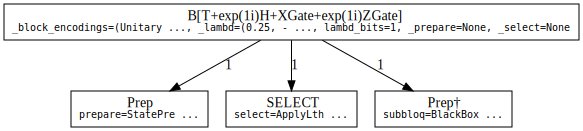

#### Counts totals:
 - `Adjoint(subbloq=Prep)`: 1
 - `Prep`: 1
 - `SELECT`: 1

In [5]:
from qualtran.resource_counting.generalizers import ignore_split_join
linear_combination_block_encoding_g, linear_combination_block_encoding_sigma = linear_combination_block_encoding.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(linear_combination_block_encoding_g)
show_counts_sigma(linear_combination_block_encoding_sigma)